In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("heart.csv")
raw_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


""" Description about the dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3) >> Get dummies

cp : Chest Pain type 

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

oldpeak = ST depression induced by exercise relative to rest

target : 0= less chance of heart attack 1= more chance of heart attack

n

"""

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


No missing values in the dataset

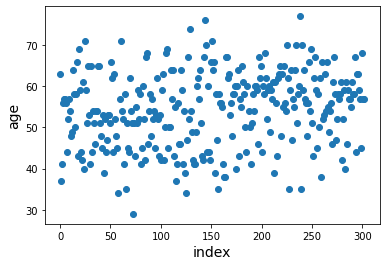

In [4]:
plt.scatter(raw_data.index,raw_data.age)
plt.xlabel('index',fontsize = 14)
plt.ylabel('age',fontsize = 14)
plt.show()

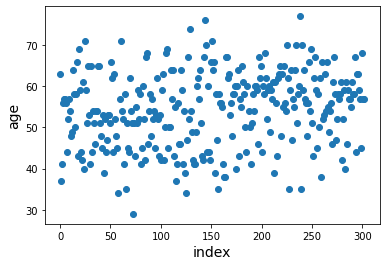

In [5]:
plt.scatter(raw_data.index,raw_data.age)
plt.xlabel('index',fontsize = 14)
plt.ylabel('age',fontsize = 14)
plt.show()

In [6]:
#People with higher chance of heart attack
raw_data[raw_data['output']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
age,165.0,52.496970,9.550651,29.0,44.0,52.0,59.0,76.0
sex,165.0,0.563636,0.497444,0.0,0.0,1.0,1.0,1.0
cp,165.0,1.375758,0.952222,0.0,1.0,2.0,2.0,3.0
trtbps,165.0,129.303030,16.169613,94.0,120.0,130.0,140.0,180.0
chol,165.0,242.230303,53.552872,126.0,208.0,234.0,267.0,564.0
fbs,165.0,0.139394,0.347412,0.0,0.0,0.0,0.0,1.0
restecg,165.0,0.593939,0.504818,0.0,0.0,1.0,1.0,2.0
thalachh,165.0,158.466667,19.174276,96.0,149.0,161.0,172.0,202.0
exng,165.0,0.139394,0.347412,0.0,0.0,0.0,0.0,1.0
oldpeak,165.0,0.583030,0.780683,0.0,0.0,0.2,1.0,4.2


In [7]:
#People with low chance of heart attack
raw_data[raw_data['output']==0].describe().T

,count,mean,std,min,25%,50%,75%,max
age,138.0,56.601449,7.962082,35.0,52.00,58.0,62.00,77.0
sex,138.0,0.826087,0.380416,0.0,1.00,1.0,1.00,1.0
cp,138.0,0.478261,0.905920,0.0,0.00,0.0,0.00,3.0
trtbps,138.0,134.398551,18.729944,100.0,120.00,130.0,144.75,200.0
chol,138.0,251.086957,49.454614,131.0,217.25,249.0,283.00,409.0
fbs,138.0,0.159420,0.367401,0.0,0.00,0.0,0.00,1.0
restecg,138.0,0.449275,0.541321,0.0,0.00,0.0,1.00,2.0
thalachh,138.0,139.101449,22.598782,71.0,125.00,142.0,156.00,195.0
exng,138.0,0.550725,0.499232,0.0,0.00,1.0,1.00,1.0
oldpeak,138.0,1.585507,1.300340,0.0,0.60,1.4,2.50,6.2


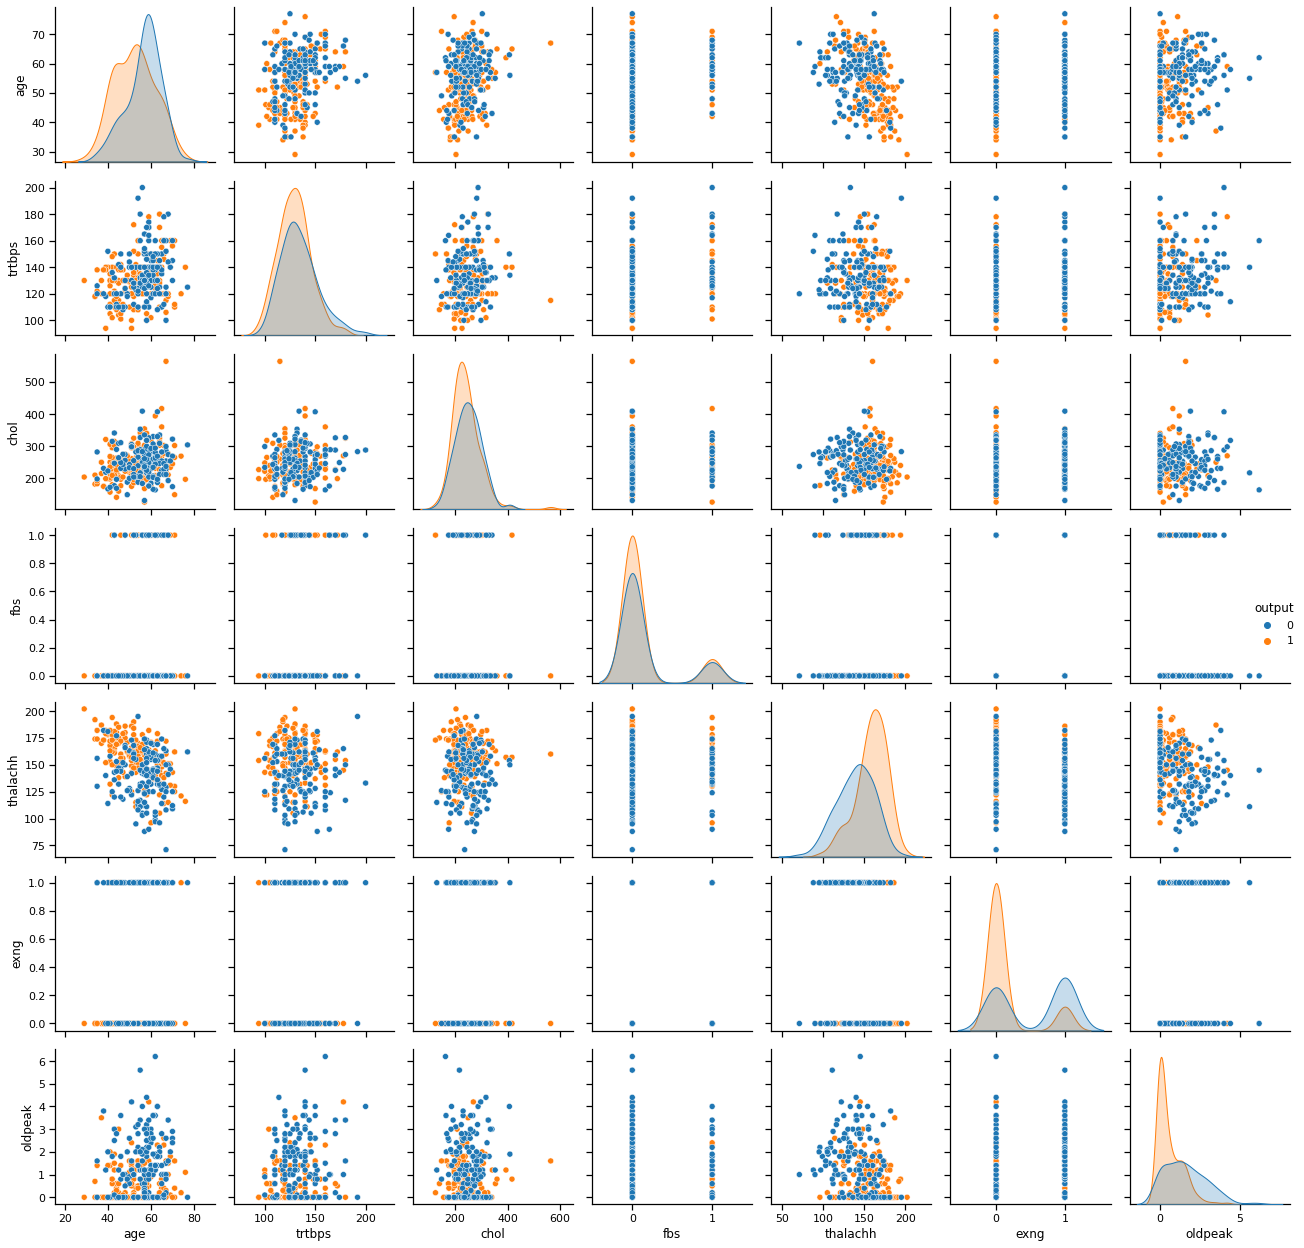

In [8]:
# pairplot
cat_var = [ 'sex','cp', 'restecg', 'slp', 'caa', 'thall'] #categorical features
sns.set_context(context='notebook',font_scale=1)
sns.pairplot(raw_data.drop(cat_var,axis=1),hue='output');
plt.tight_layout()

In [9]:
#columns
raw_data.columns.values

array(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'], dtype=object)

In [10]:
# All categorical features with their unique members.
for i in cat_var: 
    print(i, raw_data[i].unique())


sex [1 0]
cp [3 2 1 0]
restecg [0 1 2]
slp [0 2 1]
caa [0 2 1 3 4]
thall [1 2 3 0]


In [11]:
num_var = [x for x in raw_data if x not in cat_var]

In [12]:
num_var.remove('output')

In [13]:
num_var

['age', 'trtbps', 'chol', 'fbs', 'thalachh', 'exng', 'oldpeak']

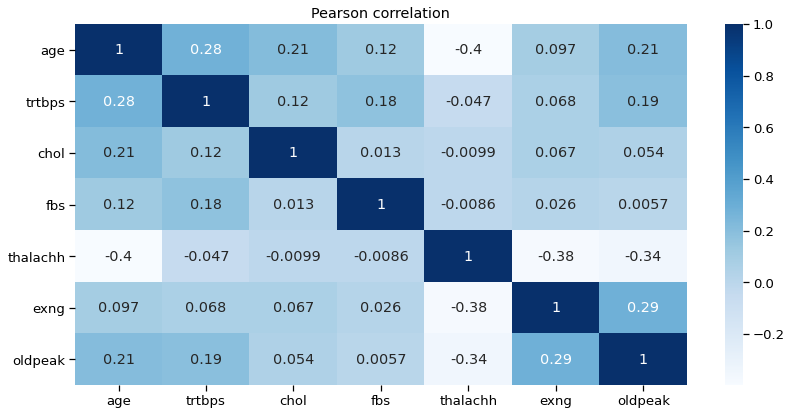

In [14]:
#To find corelation betweeen variables:
plt.figure(figsize=(12,6))
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(raw_data[num_var].corr('pearson'),annot=True,cmap='Blues');
plt.title('Pearson correlation');
plt.tight_layout();

According to the result of hitmap there is not high corelation among the variables

In [15]:
#Getting dummies from categorical variables'
raw_data = pd.get_dummies(raw_data, columns =cat_var)
raw_data.head()

,age,trtbps,chol,fbs,thalachh,exng,oldpeak,output,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,1,150,0,2.3,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,0,187,0,3.5,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,0,172,0,1.4,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,0,178,0,0.8,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,0,163,1,0.6,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [16]:
df = raw_data.copy()

## Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_var] = scaler.fit_transform(df[num_var])


In [18]:
df.head()

,age,trtbps,chol,fbs,thalachh,exng,oldpeak,output,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,2.394438,0.015443,-0.696631,1.087338,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,-0.417635,1.633471,-0.696631,2.122573,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,-0.417635,0.977514,-0.696631,0.310912,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,-0.417635,1.239897,-0.696631,-0.206705,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,-0.417635,0.583939,1.435481,-0.379244,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0


In [19]:
df_pr = df.copy()

## Model

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop(['output'], axis = 1)
y = df.output

X_train , X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42 )

In [22]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
reg.score(X_train, y_train)

0.8677685950413223

In [24]:
y_pred = reg.predict(X_test)

In [25]:

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8852459016393442
Precision: 0.9032258064516129
Recall: 0.875


Text(0.5, 9.5, 'Predicted')

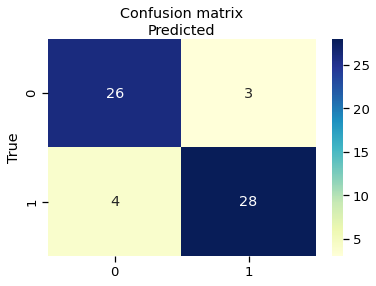

In [26]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')